In [1]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [94]:
import scipy.io
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [4]:
# Load the .mat file
mat_data = scipy.io.loadmat('Gaze360/metadata.mat')

# Access data
print(mat_data)  # This will print all the contents of the .mat file




{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jun 28 13:47:39 2019', '__version__': '1.0', '__globals__': [], 'recordings': array([[array(['rec_000'], dtype='<U7'), array(['rec_001'], dtype='<U7'),
        array(['rec_002'], dtype='<U7'), array(['rec_003'], dtype='<U7'),
        array(['rec_004'], dtype='<U7'), array(['rec_005'], dtype='<U7'),
        array(['rec_006'], dtype='<U7'), array(['rec_007'], dtype='<U7'),
        array(['rec_008'], dtype='<U7'), array(['rec_009'], dtype='<U7'),
        array(['rec_010'], dtype='<U7'), array(['rec_011'], dtype='<U7'),
        array(['rec_012'], dtype='<U7'), array(['rec_013'], dtype='<U7'),
        array(['rec_014'], dtype='<U7'), array(['rec_015'], dtype='<U7'),
        array(['rec_016'], dtype='<U7'), array(['rec_017'], dtype='<U7'),
        array(['rec_018'], dtype='<U7'), array(['rec_019'], dtype='<U7'),
        array(['rec_020'], dtype='<U7'), array(['rec_021'], dtype='<U7'),
        array(['rec_022'], dtype='<U7'

In [5]:
your_variable = mat_data['recordings']
print(your_variable)


[[array(['rec_000'], dtype='<U7') array(['rec_001'], dtype='<U7')
  array(['rec_002'], dtype='<U7') array(['rec_003'], dtype='<U7')
  array(['rec_004'], dtype='<U7') array(['rec_005'], dtype='<U7')
  array(['rec_006'], dtype='<U7') array(['rec_007'], dtype='<U7')
  array(['rec_008'], dtype='<U7') array(['rec_009'], dtype='<U7')
  array(['rec_010'], dtype='<U7') array(['rec_011'], dtype='<U7')
  array(['rec_012'], dtype='<U7') array(['rec_013'], dtype='<U7')
  array(['rec_014'], dtype='<U7') array(['rec_015'], dtype='<U7')
  array(['rec_016'], dtype='<U7') array(['rec_017'], dtype='<U7')
  array(['rec_018'], dtype='<U7') array(['rec_019'], dtype='<U7')
  array(['rec_020'], dtype='<U7') array(['rec_021'], dtype='<U7')
  array(['rec_022'], dtype='<U7') array(['rec_023'], dtype='<U7')
  array(['rec_024'], dtype='<U7') array(['rec_025'], dtype='<U7')
  array(['rec_026'], dtype='<U7') array(['rec_027'], dtype='<U7')
  array(['rec_028'], dtype='<U7') array(['rec_029'], dtype='<U7')
  array(['

In [14]:
len(mat_data['person_eyes2d'])

197588

Image path: ./Gaze360/imgs/rec_000/head/000000/000085.jpg
Index: 87
	gaze_3d =[ 0.81870118 -0.38923663  0.42216492]
	eyes2d =[0.45956194 0.4769139 ]


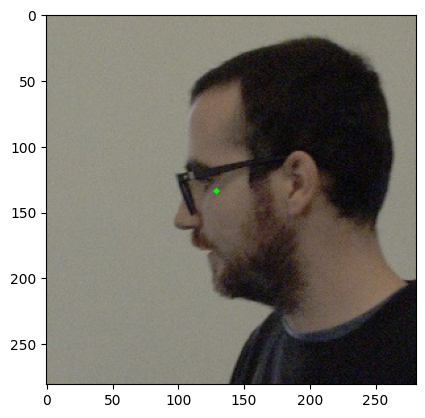

In [92]:
recordings = mat_data['recordings'][0]
recording = mat_data['recording'][0]
cropType = "head"
frame = mat_data['frame'][0]
person_identity = mat_data['person_identity'][0]
person_eyes2d = mat_data['person_eyes2d']
gaze_dir = mat_data['gaze_dir']
person_head_bbox = mat_data['person_head_bbox']
person_eye_left_bbox = mat_data['person_eye_left_bbox']

i = randint(0,200)

path = "./Gaze360/imgs/"
path +=    str(recordings[recording[i]][0])
path +=     "/"
path +=     cropType
path +=     "/"
path +=     '%06d' % person_identity[i]
path +=     "/"
path +=     '%06d.jpg' % frame[i]

print(f"Image path: {path}")

im = cv2.imread(path)

gaze_3d = gaze_dir[i]
print(f"Index: {i}")
print(f"\tgaze_3d ={gaze_3d}")
print(f"\teyes2d ={person_eyes2d[i]}")

im_rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
height,width,_ = im_rgb.shape
dot_pos = (int(person_eyes2d[i][0]*width),int(person_eyes2d[i][1]*height))
im_rgb = cv2.circle(im_rgb, dot_pos, radius=2, color=(0, 255, 0), thickness=-1)  # Green color, filled circle


plt.imshow(im_rgb)

In [102]:
headBBInFull = person_head_bbox[i,:]
eyeBBInFull = person_eye_left_bbox[i,:]
eyeBBInCrop = [
    (eyeBBInFull[0] - headBBInFull[0]) / headBBInFull[2], # subtract offset of the crop
    (eyeBBInFull[1] - headBBInFull[1]) / headBBInFull[3], 
    eyeBBInFull[2] / headBBInFull[2], # scale to smaller space of the crop
    eyeBBInFull[3] / headBBInFull[3], 
    ]
imHead = im_rgb
cropSizePx = np.array([imHead.shape[1], imHead.shape[0]]) # should be equal to -> (headBBInFull[2:] * [3382, 4096]).astype(int)
eyeBBInCropPx = np.concatenate([eyeBBInCrop[:2] * cropSizePx, eyeBBInCrop[2:] * cropSizePx]).astype(int)

imEye = imHead[
    eyeBBInCropPx[1]:(eyeBBInCropPx[1]+eyeBBInCropPx[3]), 
    eyeBBInCropPx[0]:(eyeBBInCropPx[0]+eyeBBInCropPx[2]),
    :]

imEye

array([], shape=(0, 0, 3), dtype=uint8)

In [109]:
eyeBBInFull

array([-1., -1., -1., -1.], dtype=float32)